In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Industries'), 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-15 to 2019-07-12 - 62


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

59


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
GDX,36,0.626337,0.830448,0.744659,26.070216,6.075660
GDXJ,36,0.581730,0.932883,0.615076,23.696029,6.657301
IHI,36,0.270034,0.375003,0.698921,9.378518,2.045544
ARKK,36,0.245108,0.791795,0.299536,7.521632,11.351589
RYT,36,0.206347,0.498449,0.398056,8.341917,6.454069
XLK,36,0.191561,0.536511,0.342256,8.136362,7.053556
XAR,36,0.190271,0.353861,0.515270,9.053498,2.376372
XLB,36,0.188344,0.545978,0.330429,8.297829,4.056015
FXH,36,0.187123,0.378433,0.473496,6.995032,2.855186


evicted IGF 0.861 0.282
evicted BOTZ 0.847 0.035
evicted GNR 0.800 0.206
evicted FXU 0.892 -0.009
evicted XLU 0.820 -0.069
evicted ITB 0.816 -0.029
evicted EMLP 0.820 0.221
evicted XLP 0.818 0.075
evicted XAR 0.733 0.301
evicted HACK 0.890 -0.266
evicted XLE 0.722 0.294
evicted IXJ 0.888 0.099
evicted AMLP 0.766 -0.025
evicted XLY 0.821 -0.002
evicted SOXX 0.779 0.237
evicted XLB 0.717 0.052
evicted GUNR 0.342 -0.013
evicted XLF 0.759 -0.096
evicted XBI 0.681 0.014
evicted ARKK 0.750 -0.040
evicted XLC 0.459 -0.219
retry backlogs ['FXL', 'VAW', 'QTEC', 'TDIV', 'IYW', 'VCR', 'VOX', 'XLI', 'VIS', 'VHT', 'IYH', 'VPU', 'XT', 'VGT', 'VFH', 'RYT', 'IXN', 'FXH', 'VDC', 'FTEC', 'FHLC', 'FBT', 'KRE', 'IGM', 'FNCL', 'FDN', 'XLK', 'IYG', 'XLV', 'IBB', 'SKYY', 'IYF', 'IGV', 'GDXJ', 'ITA', 'KBE'] at 0.905/-0.51 - 0.925
evicted XLI 0.901 0.308
evicted RYT 0.892 0.057
evicted ITA 0.657 0.330
evicted VAW 0.729 0.101
evicted VDC 0.825 0.046
evicted VCR 0.775 -0.017
evicted FHLC 0.899 0.110
evicted VPU 

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,0.412143,0.438056,-0.444343,0.100661,0.353043,0.674805,1.292327,0.922729,15.838205,2.194511
GDX,36.0,0.626337,0.830448,-1.240153,-0.006610,0.393313,1.170660,2.232475,0.744659,26.070216,6.075660
IHI,36.0,0.270034,0.375003,-0.266446,0.007830,0.172181,0.542306,1.267406,0.698921,9.378518,2.045544


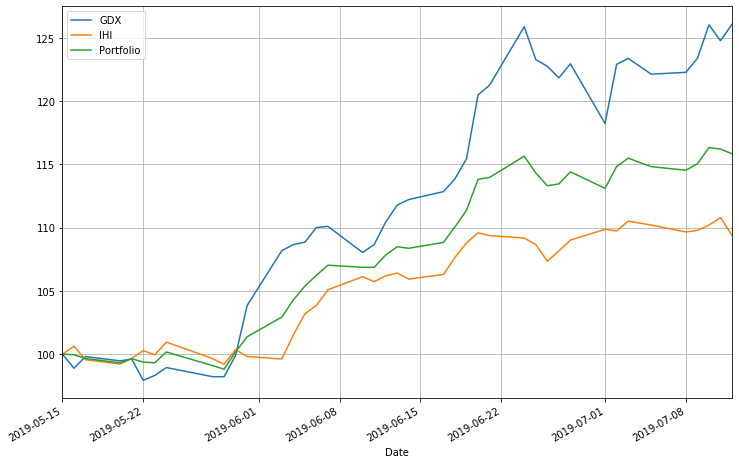

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)